In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re

from eunjeon import Mecab
from collections import Counter
from nltk.corpus import stopwords

In [2]:
font_path = "c:/Windows/Fonts/malgun.ttf"

In [3]:
df = pd.read_csv('Czech_comments.csv')
df.head()

,country,sight,review_title,review_content
0,체코,프라하 동물원,그냥저냥 동물원....,해외까지가서 동물원에 가는 것은 좀.... 차라리 동네를 더 구경하시는 것이 좋을 ...
1,체코,프라하 동물원,실망한,"그래서이 동물원이 얼마나 좋은지, 그리고 세계에서 어떤 숫자인지 읽습니다. . . ..."
2,체코,프라하 동물원,방문하기에 매우 슬픈 곳,"모든 동물은 작은 울림 속에 있었고, 고통의 분명한 징후를 보이기 위해 간격을 두었..."
3,체코,프라하 동물원,충격적인 고객 서비스,"북극곰이 작은 인클로저에 있지만 오늘 동물원을 방문했을 때, 그것은 반복적으로 반복..."
4,체코,프라하 동물원,긴급한 현대화 / 업그레이드 필요,나는 동물원을 좋아한다. 그들은 멸종 위기에 처한 종의 보존에 좋습니다. 또한 북극...


In [4]:
reviews = df['review_content'].tolist()

In [5]:
review = str(reviews)
data = re.compile('[^\w]').sub(' ', review)
# data

In [6]:
tagger = Mecab()

In [7]:
bow = tagger.nouns(data)

In [8]:
cnt = Counter(bow)

In [9]:
most_cnt = cnt.most_common(100)

In [10]:
mystopwords = [',', '.', 'ㄴ', '은', '는', '이', '가', '에', '을', '를', '위한']

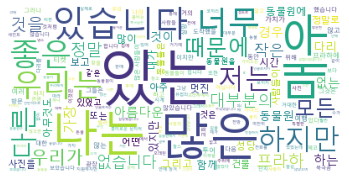

In [11]:
wc = WordCloud(background_color='white', font_path="c:/Windows/Fonts/malgun.ttf", stopwords=mystopwords)
wc.generate(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [42]:
# mask 이미지 만들기
icon = Image.open('aaa.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [43]:
text = ' '.join(bow)

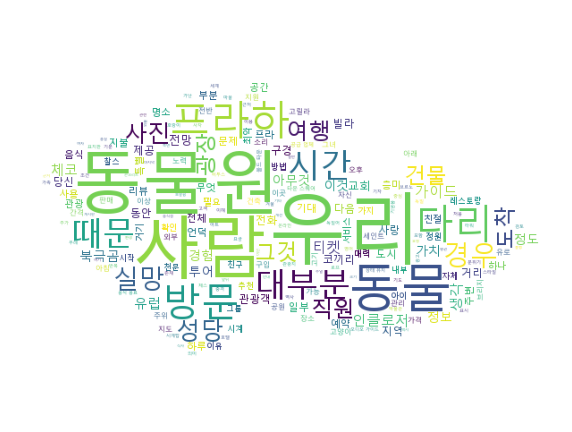

In [45]:
wc = WordCloud(background_color='white', font_path="c:/Windows/Fonts/malgun.ttf", stopwords=mystopwords, mask=mask)
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.savefig('Czechia.jpg')
plt.show()